In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import thư viện**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree, svm
from sklearn.svm import SVC
from sklearn.model_selection import (train_test_split, KFold, cross_val_score)
from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay,
                             f1_score, recall_score, precision_score, precision_recall_fscore_support)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import (BaggingClassifier, AdaBoostClassifier, RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder)
from sklearn.compose import ColumnTransformer, make_column_transformer

from imblearn.over_sampling import SMOTE
import pickle
import time

# **Kiểm tra Dataset từ file CSV**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 3810 non-null   int64  
 1   Nickname           3810 non-null   object 
 2   Class              3810 non-null   object 
 3   Area               3810 non-null   int64  
 4   Perimeter          3808 non-null   object 
 5   Major_Axis_Length  3809 non-null   float64
 6   Minor_Axis_Length  3808 non-null   float64
 7   Eccentricity       3807 non-null   float64
 8   Convex_Area        3808 non-null   float64
 9   Extent             3809 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 297.8+ KB
Số lượng mẫu:  3810
Số lượng thuộc tính:  9
Biểu đồ nhãn: 


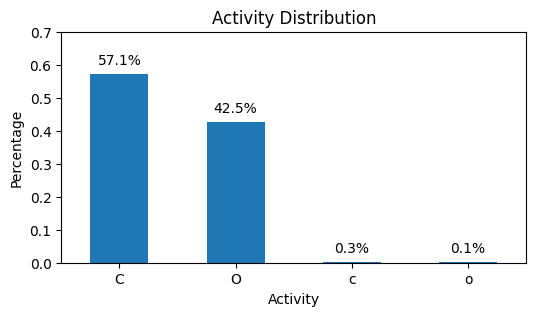

Dữ liệu (5 dòng đầu):


,Id,Nickname,Class,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,1,R1,C,15231,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896
1,2,R2,C,14656,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436
2,3,R3,C,14634,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259
3,4,R4,C,13176,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669
4,5,R5,C,14688,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024


Bảng thống kê: 


,Id,Area,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3.809000e+03,3.808000e+03,3807.000000,3808.000000,3809.000000
mean,1905.500000,12667.727559,5.449211e+10,2.337121e+09,0.886855,12951.602679,0.661898
std,1099.996591,1732.367706,3.363091e+12,1.442214e+11,0.020814,1776.993031,0.077218
min,1.000000,7551.000000,1.452645e+02,5.953241e+01,0.777233,7723.000000,0.497413
25%,953.250000,11370.500000,1.743524e+02,8.273024e+01,0.872377,11625.500000,0.598853
50%,1905.500000,12421.500000,1.858019e+02,8.643465e+01,0.889033,12705.500000,0.645359
75%,2857.750000,13950.000000,2.035594e+02,9.014694e+01,0.902566,14281.000000,0.726422
max,3810.000000,18913.000000,2.075602e+14,8.899756e+12,0.948007,19099.000000,0.861050


In [ ]:
# Đọc dữ liệu từ file CSV
df = pd.read_excel("/content/drive/MyDrive/CT312-Data Mining/Project(Data_Mining)/Rice2024.xlsx")

#Thông tin về dataset
df.info()

print("========================")
#Số lượng mẫu, thuộc tính
print("Số lượng mẫu: ", len(df))
print("Số lượng thuộc tính: ", df.shape[1]-1)

# Đếm số lượng các lớp
class_counts = df['Id'].value_counts()

#Biểu đồ nhãn
print("Biểu đồ nhãn: ")
Activity_counts = df['Class'].value_counts(normalize=True)

plt.figure(figsize=(6, 3))
ax = Activity_counts.plot(kind='bar')
plt.title('Activity Distribution', fontsize=12)
plt.xlabel('Activity', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.xticks(ticks=[0,1,2,3], labels=['C', 'O','c','o'], rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim([0, 0.7])

for p in ax.patches:
    ax.annotate(f'{p.get_height() * 100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.show()

# #Nhãn 5 dòng đầu
# print("Nhãn 5 hàng đầu:")
# print(df['Activity'][0:5])

print("========================")
#5 hàng đầu
print("Dữ liệu (5 dòng đầu):")
display(df.head())

print("========================")
#Thống kê, tóm tắt dữ liệu:
print("Bảng thống kê: ")
df.describe()

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/CT312-Data Mining/Project(Data_Mining)/Rice2024_v1.xlsx")
df= df.drop(columns=['Id','Nickname'])
df[df.isnull().any(axis=1)] #kiểm tra dữ liệu bị thiếu

,Class,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
423,C,13557,483.908997,206.203720,84.387306,NaN,13845.0,0.552580
1023,C,15475,NaN,220.476929,90.207230,0.912469,15734.0,0.827319
2545,C,14746,504.313995,220.343445,NaN,NaN,NaN,NaN
3500,C,14011,NaN,NaN,NaN,NaN,NaN,0.777611


In [ ]:
#Xóa các dòng có từ 3 giá trị bị thiếu
df_dropna = df.dropna(thresh=len(df.columns) - 3) #thread = so du lieu đủ
df_dropna[df_dropna.isnull().any(axis=1)] #kiểm tra dữ liệu bị thiếu

,Class,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
423,C,13557,483.908997,206.203720,84.387306,NaN,13845.0,0.552580
1023,C,15475,NaN,220.476929,90.207230,0.912469,15734.0,0.827319


In [ ]:
columns_to_fill = ['Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Convex_Area', 'Extent']
# Chỉ thay thế NaN trong các cột cụ thể bằng giá trị trung bình của từng cột
df_dropna[columns_to_fill] = df_dropna[columns_to_fill].fillna(df_dropna[columns_to_fill].mean())

<ipython-input-9-b23f0b6b2ceb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna[columns_to_fill] = df_dropna[columns_to_fill].fillna(df_dropna[columns_to_fill].mean())


In [ ]:
#kiểm tra lại dữ liệu bị thiếu
df_dropna[df_dropna.isnull().any(axis=1)]
df_dropna['Class'] = df_dropna['Class'].str.upper()
df_dropna

<ipython-input-10-fc6d15b3cdb5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropna['Class'] = df_dropna['Class'].str.upper()


,Class,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,C,15231,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896
1,C,13485,471.570007,198.272644,87.727287,0.896789,13734.0,0.572320
2,C,14601,505.248993,215.934387,86.758720,0.915735,14991.0,0.668544
3,C,14531,492.958008,207.624603,90.522667,0.899951,14913.0,0.571254
4,C,13657,481.618988,207.013153,84.518692,0.912858,13872.0,0.567340
...,...,...,...,...,...,...,...,...
3805,C,15093,509.304993,214.428116,90.883278,0.905737,15497.0,0.572616
3806,C,12789,454.389008,183.624557,89.721130,0.872501,13114.0,0.695054
3807,C,12767,463.842010,196.193039,83.973564,0.903772,13104.0,0.606220
3808,C,12079,445.994995,190.673599,81.133247,0.904954,12462.0,0.642671


In [ ]:
# Lưu DataFrame vào file Excel
df_dropna.to_excel('Rice2024_v2.xlsx', index=False)

In [ ]:
df_new= pd.read_excel("/content/drive/MyDrive/CT312-Data Mining/Project(Data_Mining)/Rice2024_v2.xlsx")
X = df_new.drop(columns=['Class'])
y = df_new['Class']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808 entries, 0 to 3807
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Class              3808 non-null   object 
 1   Area               3808 non-null   int64  
 2   Perimeter          3808 non-null   float64
 3   Major_Axis_Length  3808 non-null   float64
 4   Minor_Axis_Length  3808 non-null   float64
 5   Eccentricity       3808 non-null   float64
 6   Convex_Area        3808 non-null   int64  
 7   Extent             3808 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 238.1+ KB


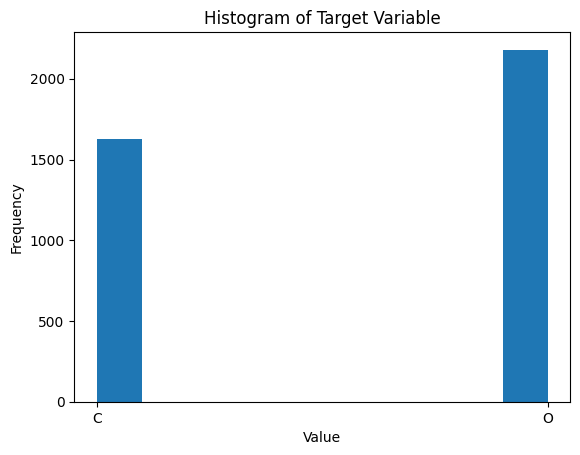

In [ ]:
plt.hist(y, bins=10)
plt.title("Histogram of Target Variable")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# Chia tập dữ liệu

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Bayes

Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: 0.903
Do chinh xac cua mo hinh voi nghi thuc kiem tra 20-fold 0.910


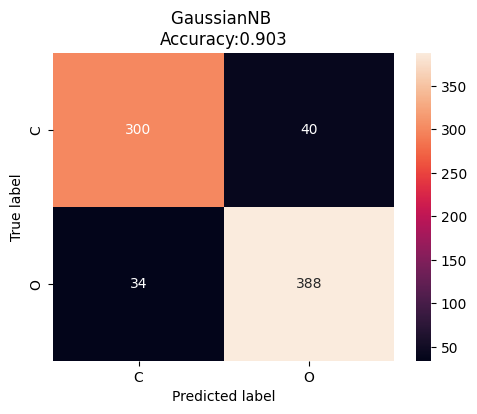

Recall: 0.9009
Precision: 0.9024
F1 Score: 0.9016
Accuracy: 0.9029


In [ ]:
# Sử dụng nghi thức kiểm tra hold-out
model = GaussianNB()
model.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra
y_pred = model.predict(X_test)
#print(prediction)
print("Do chinh xác cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" % accuracy_score(y_test,y_pred ))
# Thực hiện nghi thức kiểm tra 5 fold
nFold = 20;
scores = cross_val_score(model, X, y, cv=nFold)
# print(scores)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra %d-fold %.3f" % (nFold, np.mean(scores)))
cm = confusion_matrix(y_test, y_pred)
# Chuyển confusion-matrix về data frame phục vụ cho việc vẽ đồ thị
cm_df = pd.DataFrame(cm)

plt.figure(figsize=(5.5, 4))
sns.heatmap(cm_df,fmt="d", annot=True, xticklabels=["C", "O"], yticklabels=["C", "O"])
plt.title('GaussianNB \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
# Đánh giá độ chính xác
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print("Recall:", round(recall,4))
print("Precision:", round(precision,4))
print("F1 Score:", round(f1,4))
print("Accuracy:", round(accuracy,4))



# DecisionTree

Do chinh xac cua mo hinh voi nghi thuc kiem tra hold-out: 0.919
Do chinh xac cua mo hinh voi nghi thuc kiem tra 20-fold 0.904


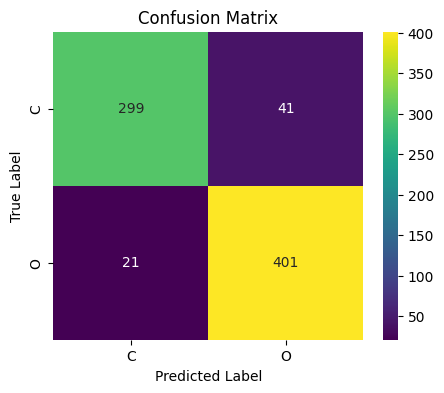

Recall: 0.9148
Precision: 0.9208
F1 Score: 0.9172
Accuracy: 0.9186


In [ ]:
model = tree.DecisionTreeClassifier(criterion="gini", max_depth=5,min_samples_leaf=5)
# model = tree.DecisionTreeClassifier(criterion="entropy", max_depth=10,min_samples_leaf=4)

model.fit(X_train, y_train)
# model.fit(X_train, y_train)

# Dự đoán nhãn tập kiểm tra
y_pred = model.predict(X_test)
# y_pred = model.predict(X_test)

# Tính độ chính xác
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" %accuracy_score(y_test, y_pred))
# Hiển thị cây
# tree.plot_tree(model.fit(X, y))
# # plt.show()

# Thực hiện nghi thức kiểm tra 5 fold
nFold = 20;
scores = cross_val_score(model, X, y, cv=nFold)
# print(scores)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra %d-fold %.3f" % (nFold, np.mean(scores)))

# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["C", "O"], yticklabels=["C", "O"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Đánh giá độ chính xác
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print("Recall:", round(recall,4))
print("Precision:", round(precision,4))
print("F1 Score:", round(f1,4))
print("Accuracy:", round(accuracy,4))


# Chuẩn hóa dữ liệu

In [ ]:
# Khởi tạo bộ StandardScaler
scaler = StandardScaler()
# Khởi tạo bộ MinMaxScaler
# scaler = MinMaxScaler()
# Chuẩn hóa dữ liệu
X_train_std = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_std  = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)

# Bagging

Do chinh xac cua mo hinh voi nghi thuc kiem tra hold-out: 0.915
Do chinh xac cua mo hinh voi nghi thuc kiem tra 20-fold 0.902


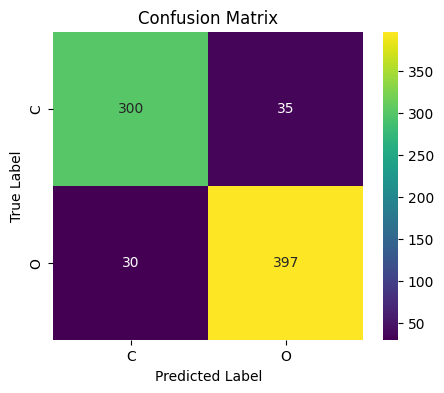

Recall: 0.9126
Precision: 0.914
F1 Score: 0.9133
Accuracy: 0.9147


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_std, y_train)

# Dự đoán nhãn tập kiểm tra
y_pred = model.predict(X_test_std)
# y_pred = model.predict(X_test)

# Tính độ chính xác
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra hold-out: %.3f" %accuracy_score(y_test, y_pred))

# Thực hiện nghi thức kiểm tra 5 fold
nFold = 20;
scores = cross_val_score(model, X, y, cv=nFold)
# print(scores)
print("Do chinh xac cua mo hinh voi nghi thuc kiem tra %d-fold %.3f" % (nFold, np.mean(scores)))

# Tính toán confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", xticklabels=["C", "O"], yticklabels=["C", "O"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Đánh giá độ chính xác
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print("Recall:", round(recall,4))
print("Precision:", round(precision,4))
print("F1 Score:", round(f1,4))
print("Accuracy:", round(accuracy,4))


# RandomForest

In [ ]:

data = pd.read_excel('/content/drive/MyDrive/CT312-Data Mining/Project(Data_Mining)/Rice2024_v2.xlsx')


X = data.drop(columns=['Class'])
y = data['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_std, y_train)


y_pred = model.predict(X_test_std)


print("Độ chính xác của mô hình với phương pháp kiểm tra hold-out: %.3f" % accuracy_score(y_test, y_pred))


nFold = 20
scores = cross_val_score(model, X, y, cv=nFold)
print("Độ chính xác của mô hình với nghi thức kiểm tra %d-fold: %.3f" % (nFold, np.mean(scores)))


recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)

print("Recall:", round(recall, 4))
print("Precision:", round(precision, 4))
print("F1 Score:", round(f1, 4))
print("Accuracy:", round(accuracy, 4))


Độ chính xác của mô hình với phương pháp kiểm tra hold-out: 0.920
Độ chính xác của mô hình với nghi thức kiểm tra 20-fold: 0.902
Recall: 0.917
Precision: 0.9203
F1 Score: 0.9185
Accuracy: 0.9199


# Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_std, y_train)
y_pred = model.predict(X_test_std)
print("Độ chính xác của mô hình với phương pháp kiểm tra hold-out: %.3f" % accuracy_score(y_test, y_pred))
nFold = 20
scores = cross_val_score(model, X, y, cv=nFold)
print("Độ chính xác của mô hình với nghi thức kiểm tra %d-fold: %.3f" % (nFold, np.mean(scores)))
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
print("Recall:", round(recall,4))
print("Precision:", round(precision,4))
print("F1 Score:", round(f1,4))
print("Accuracy:", round(accuracy,4))

Độ chính xác của mô hình với phương pháp kiểm tra hold-out: 0.930
Độ chính xác của mô hình với nghi thức kiểm tra 20-fold: 0.929
Recall: 0.9296
Precision: 0.9293
F1 Score: 0.9294
Accuracy: 0.9304


# Đánh giá mô hình

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/CT312-Data Mining/Project(Data_Mining)/Rice2024_v2.xlsx')

# Xác định các cột đặc trưng và cột nhãn
X = df.drop('Class', axis=1)  # 'Class' là tên cột nhãn trong dữ liệu của bạn
y = df['Class']  # Cột nhãn

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tiền xử lý dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo mô hình và tính toán độ chính xác, precision, recall và F1 score
models = {
    "Logistic Regression": LogisticRegression(),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Tạo một danh sách để lưu trữ kết quả
results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Sử dụng 'weighted' cho đa lớp
    recall = recall_score(y_test, y_pred, average='weighted')  # Sử dụng 'weighted' cho đa lớp
    f1 = f1_score(y_test, y_pred, average='weighted')  # Sử dụng 'weighted' cho đa lớp

    # Thêm kết quả vào danh sách
    results.append({"Model": model_name,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1 Score": f1})

# Chuyển đổi danh sách kết quả thành DataFrame
results_df = pd.DataFrame(results)

print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.925197   0.925151  0.925197  0.925133
1              Bagging  0.914698   0.914648  0.914698  0.914595
2        Random Forest  0.919948   0.920020  0.919948  0.919788
3          Naive Bayes  0.925197   0.925174  0.925197  0.925106
4        Decision Tree  0.883202   0.883340  0.883202  0.882822


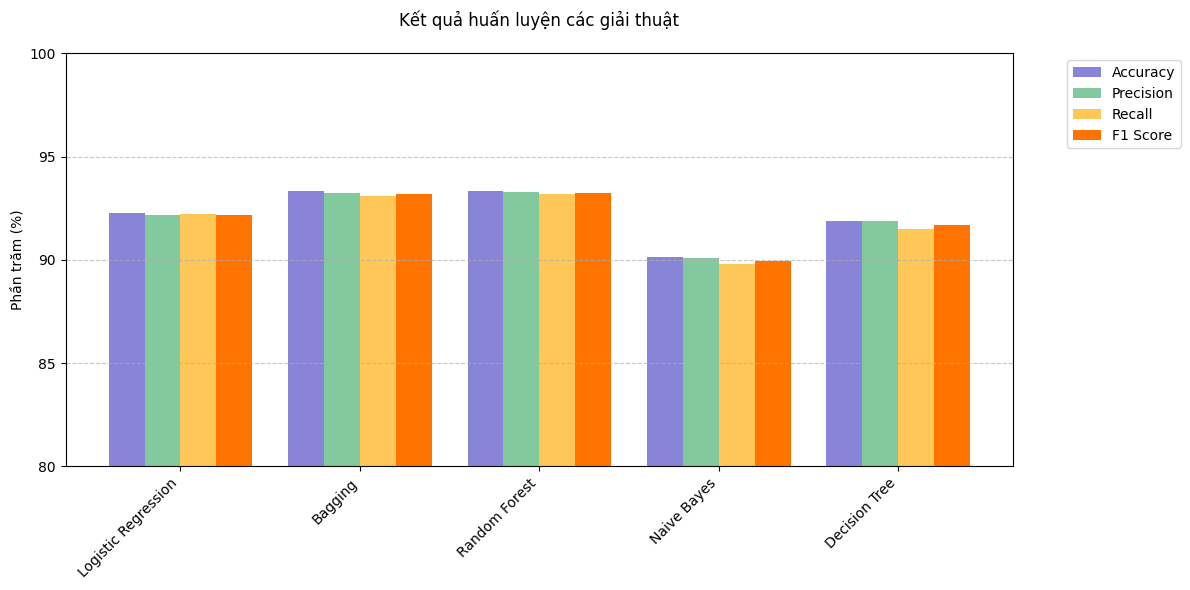

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dữ liệu đầu vào
data = {
    'Model': ['Logistic Regression', 'Bagging', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Accuracy': [92.26, 93.31, 93.31, 90.16, 91.86],
    'Precision': [92.18, 93.25, 93.27, 90.09, 91.9],
    'Recall': [92.2, 93.09, 93.2, 89.81, 91.49],
    'F1 Score': [92.19, 93.17, 93.24, 89.94, 91.67]
}

def plot_performance_chart():
    """Vẽ biểu đồ hiệu suất các mô hình với thang đo từ 80-100%"""
    # Tạo DataFrame
    df = pd.DataFrame(data)

    # Tạo figure mới với kích thước xác định
    plt.figure(figsize=(12, 6))

    # Thiết lập các thông số cho cột
    x = range(len(df['Model']))
    width = 0.2

    # Vẽ các cột cho từng metric
    plt.bar(x, df['Accuracy'], width, label='Accuracy', color='#8884d8')
    plt.bar([i + width for i in x], df['Precision'], width, label='Precision', color='#82ca9d')
    plt.bar([i + width * 2 for i in x], df['Recall'], width, label='Recall', color='#ffc658')
    plt.bar([i + width * 3 for i in x], df['F1 Score'], width, label='F1 Score', color='#ff7300')

    # Tùy chỉnh đồ thị
    plt.xticks([i + width * 1.5 for i in x], df['Model'], rotation=45, ha='right')
    plt.title('Kết quả huấn luyện các giải thuật', pad=20, fontsize=12)
    plt.ylabel('Phần trăm (%)', fontsize=10)

    # Thêm lưới với khoảng cách 5%
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
    plt.yticks(np.arange(80, 101, 5))  # Tạo các mốc chia từ 80 đến 100, mỗi 5%

    # Thiết lập giới hạn trục y từ 80 đến 100
    plt.ylim(80, 100)

    # Thêm chú thích
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Điều chỉnh layout để hiển thị đầy đủ
    plt.tight_layout()

    # Hiển thị biểu đồ
    plt.show()

if __name__ == "__main__":
    # Vẽ biểu đồ
    plot_performance_chart()


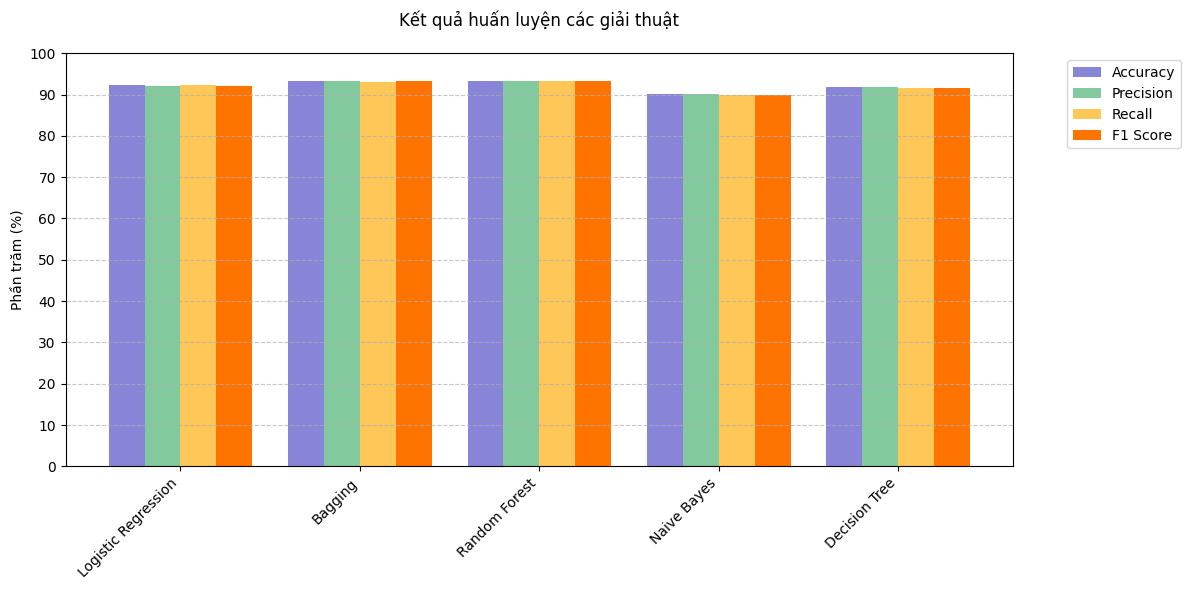

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dữ liệu đầu vào
data = {
    'Model': ['Logistic Regression', 'Bagging', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Accuracy': [92.26, 93.31,93.31,90.16,91.86],
    'Precision': [92.18, 93.25,93.27,90.09,91.9],
    'Recall': [92.2, 93.09,93.2,89.81,91.49],
    'F1 Score': [92.19,93.17,93.24,89.94,91.67]
}

def plot_performance_chart():
    """Vẽ biểu đồ hiệu suất các mô hình với thang đo từ 0-100%"""
    # Tạo DataFrame
    df = pd.DataFrame(data)

    # Tạo figure mới với kích thước xác định
    plt.figure(figsize=(12, 6))

    # Thiết lập các thông số cho cột
    x = range(len(df['Model']))
    width = 0.2

    # Vẽ các cột cho từng metric
    bars1 = plt.bar(x, df['Accuracy'], width, label='Accuracy', color='#8884d8')
    bars2 = plt.bar([i + width for i in x], df['Precision'], width, label='Precision', color='#82ca9d')
    bars3 = plt.bar([i + width * 2 for i in x], df['Recall'], width, label='Recall', color='#ffc658')
    bars4 = plt.bar([i + width * 3 for i in x], df['F1 Score'], width, label='F1 Score', color='#ff7300')

    # Tùy chỉnh đồ thị
    plt.xticks([i + width * 1.5 for i in x], df['Model'], rotation=45, ha='right')
    plt.title('Kết quả huấn luyện các giải thuật', pad=20, fontsize=12)
    plt.xlabel('', fontsize=10)
    plt.ylabel('Phần trăm (%)', fontsize=10)

    # Thêm lưới với khoảng cách 10%
    plt.grid(True, linestyle='--', alpha=0.7, axis='y')
    plt.yticks(np.arange(0, 101, 10))  # Tạo các mốc chia từ 0 đến 100, mỗi 10%

    # Thiết lập giới hạn trục y từ 0 đến 100
    plt.ylim(0, 100)

    # Thêm chú thích
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Lưu biểu đồ
    def save_plot(filename='model_performance.png'):
        """Lưu biểu đồ"""
        plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Điều chỉnh layout để hiển thị đầy đủ
    plt.tight_layout()

    # Hiển thị biểu đồ
    plt.show()

if __name__ == "__main__":
    # Vẽ biểu đồ
    plot_performance_chart()